# Anupur

In [3]:
# This is the arima model implementation in the madhya pradesh
# Import libraries
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

<class 'pandas.core.frame.DataFrame'>
                     state district   market commodity variety  min_price  \
Date                                                                        
2023-02-02  Madhya Pradesh   Anupur  Anuppur     Wheat   Deshi       2200   
2023-02-20  Madhya Pradesh   Anupur  Anuppur     Wheat   Deshi       1700   
2023-04-06  Madhya Pradesh   Anupur  Anuppur     Wheat   Deshi       1800   
2023-04-14  Madhya Pradesh   Anupur  Anuppur     Wheat   Deshi       1800   
2023-04-22  Madhya Pradesh   Anupur  Anuppur     Wheat   Deshi       1800   
...                    ...      ...      ...       ...     ...        ...   
2023-08-01  Madhya Pradesh   Anupur    Kotma     Wheat   Other       2210   
2023-08-17  Madhya Pradesh   Anupur    Kotma     Wheat   Other       2350   
2023-08-29  Madhya Pradesh   Anupur    Kotma     Wheat   Other       2140   
2023-09-05  Madhya Pradesh   Anupur    Kotma     Wheat   Other       2300   
2023-09-11  Madhya Pradesh   Anupur   

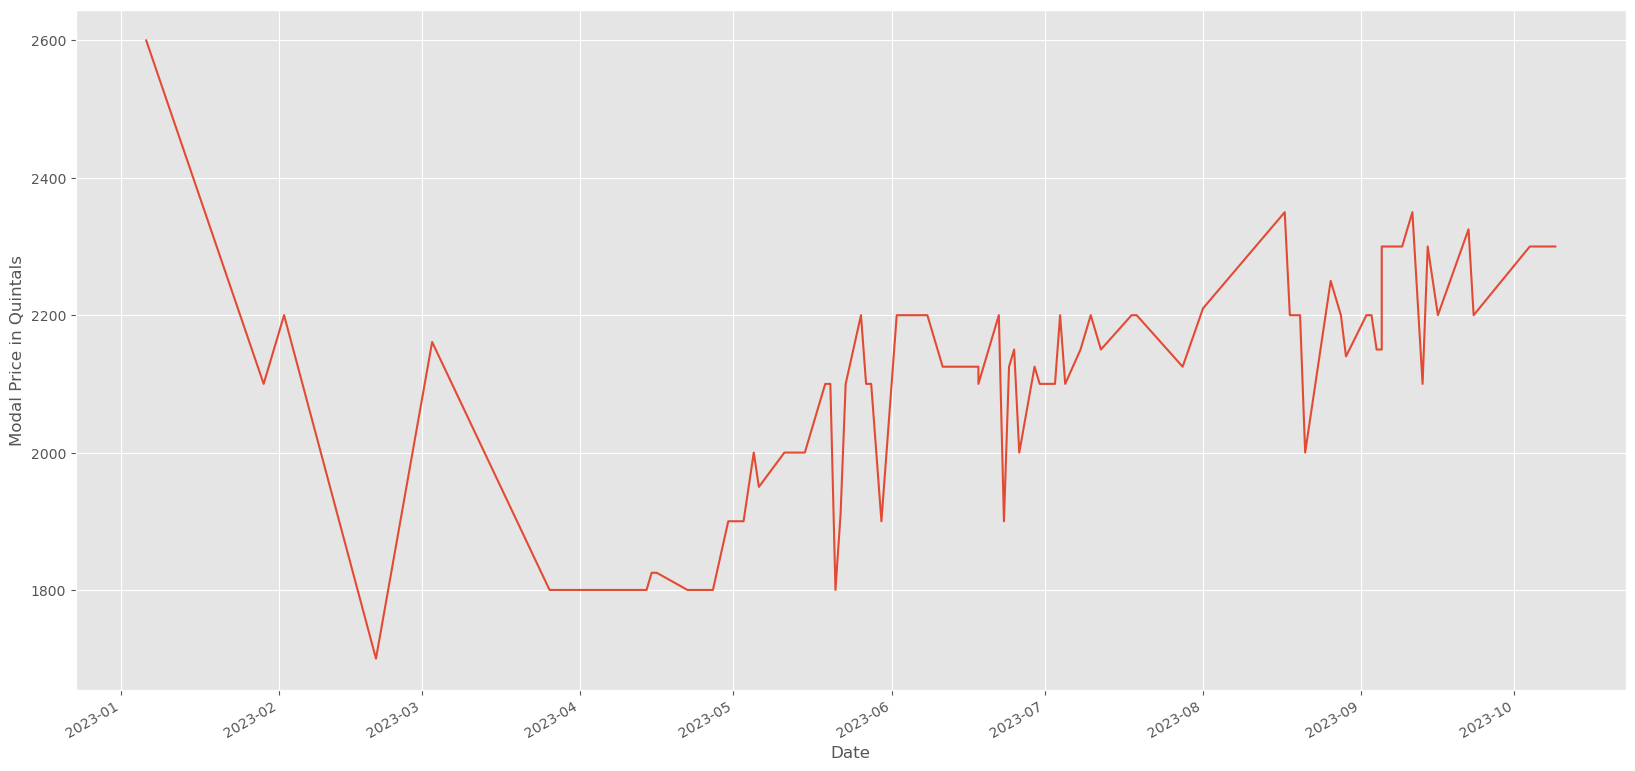

<class 'list'>


In [4]:
data = pd.read_csv('/run/media/rishabh/New Volume/projects/wheat-price-predictor/Data/Proper/MP_Anupur_2023.csv',engine='python')
print(type(data))
#changing column name
c_names = data.columns.tolist()
c_names[c_names.index('arrival_date')] = 'Date'
data.columns=c_names


#converting the column to datetime value
data['Date'] = pd.to_datetime(data['Date'],format="%d/%m/%Y")
#print(data)
data.set_index(['Date'],inplace=True)
print(data)
data['modal_price'].plot()
plt.ylabel('Modal Price in Quintals')
plt.xlabel('Date')
plt.show()
# Removing the other colunms for clarity
print(type(c_names))

#print(data.describe())
#for i in c_names:
#    del data[i]

In [5]:
# for item in c_names[:]:  
#     if item == 'modal_price' or item == 'Date':
#         continue
#     else:
#         del data[item]  

#print(c_names)
#print(data.columns.tolist())
 
#print(data)
#print(data.columns.tolist())
#print(data.sort_index())
data_noduplicate = data[data.index.duplicated(keep='first')]
data_cp = data_noduplicate.sort_index()
print("No duplicates")
#print(data_noduplicate)
#print(data_cp)

del data['state']
del data['district']
del data['market']
del data['commodity']
del data['variety']
del data['min_price']
del data['max_price']
del data['update_date']
data

No duplicates


,modal_price
Date,
2023-02-02,2200
2023-02-20,1700
2023-04-06,1800
2023-04-14,1800
2023-04-22,1800
...,...
2023-08-01,2210
2023-08-17,2350
2023-08-29,2140


In [6]:

# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p,d and q triplets
pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))




Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [7]:
train_data = data['2023-01-02':'2023-09-03']
test_data = data['2023-09-04':'2023-10-10']

print("Hello world")
train_data
#test_data

Hello world


/tmp/ipykernel_11305/2561892837.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  train_data = data['2023-01-02':'2023-09-03']


,modal_price
Date,
2023-02-02,2200
2023-02-20,1700
2023-04-06,1800
2023-04-14,1800
2023-04-22,1800
...,...
2023-03-03,2161
2023-06-30,2100
2023-08-01,2210


In [8]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.92944D+00    |proj g|=  8.04690D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   8.047D-07   8.929D+00
  F =   8.9294420661564562     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:1252.1218892619038

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the boun


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  4.35276D+00    |proj g|=  9.41178D-01

At iterate   10    f=  4.34876D+00    |proj g|=  1.13202D-03

At iterate   15    f=  4.34876D+00    |proj g|=  4.59291D-03

At iterate   20    f=  4.34873D+00    |proj g|=  6.10382D-02

At iterate   25    f=  4.33324D+00    |proj g|=  1.28378D-01

At iterate   30    f=  4.32231D+00    |proj g|=  2.00045D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     38      1     0     0   5.454D-04   4.322D+00
  F =   4.3223127001288555     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:613.1237780180

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74289D+00    |proj g|=  9.22358D-01

At iterate    5    f=  3.25738D+00    |proj g|=  1.35929D-01

At iterate   10    f=  3.22963D+00    |proj g|=  1.59516D-03

At iterate   15    f=  3.22961D+00    |proj g|=  1.46020D-03

At iterate   20    f=  3.22845D+00    |proj g|=  2.34387D-02

At iterate   25    f=  3.22064D+00    |proj g|=  8.04020D-03

At iterate   30    f=  3.22059D+00    |proj g|=  8.41505D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  3.20456D+00    |proj g|=  1.90539D-02

At iterate   15    f=  3.20452D+00    |proj g|=  3.88428D-03

At iterate   20    f=  3.20452D+00    |proj g|=  6.97831D-03

At iterate   25    f=  3.20451D+00    |proj g|=  8.28635D-03

At iterate   30    f=  3.20444D+00    |proj g|=  7.18668D-02

At iterate   35    f=  3.20313D+00    |proj g|=  3.87951D-02

At iterate   40    f=  3.19445D+00    |proj g|=  2.80863D-01

At iterate   45    f=  3.19114D+00    |proj g|=  7.58829D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     71      1     0     0   2.043D-05   3.191D+00
  F =   3.19114290709


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     14      1     0     0   1.363D-05   1.881D+00
  F =   1.8811676918758617     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:271.36347686262064

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88157D+00    |proj g|=  1.80156D-02

At iterate    5    f=  1.88109D+00    |proj g|=  6.67345D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tni

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE, 12) - AIC:273.3509202890303

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.45798D+00    |proj g|=  6.59737D-02

At iterate    5    f=  8.45670D+00    |proj g|=  3.37761D-04

At iterate   10    f=  8.45669D+00    |proj g|=  9.22655D-03

At iterate   15    f=  8.45431D+00    |proj g|=  1.60903D-01

At iterate   20    f=  8.21987D+00    |proj g|=  3.52568D-01

At iterate   25    f=  8.16900D+00    |proj g|=  5.72154D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     27

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.13711D+00    |proj g|=  5.22529D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     22      1     0     0   5.154D-06   4.137D+00
  F =   4.1370750901821465     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:585.1905126255004

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11357D+00    |proj g|=  9.18202D-02

At iterate    5    f=  7.10004D+00    |proj g|=  5.07779D-03

At iterate   10    f=  7.09992D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  5.24967D+00    |proj g|=  4.76484D-01

At iterate   40    f=  5.24847D+00    |proj g|=  3.75078D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     61      1     0     0   3.751D-07   5.248D+00
  F =   5.2484726958220698     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:742.7861774150898

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.39041D+00    |proj g|=  1.01420D-01

At iterate    5    f=  4.38272D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.62986D+00    |proj g|=  3.12079D-04

At iterate   10    f=  5.62942D+00    |proj g|=  2.15001D-03

At iterate   15    f=  5.59570D+00    |proj g|=  2.45917D-02

At iterate   20    f=  4.65882D+00    |proj g|=  4.02606D+00

At iterate   25    f=  4.36470D+00    |proj g|=  8.87249D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     50      1     0     0   5.319D-06   4.365D+00
  F =   4.3645128898092445     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:619.0318045732943

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate   20    f=  5.62953D+00    |proj g|=  3.54240D-03

At iterate   25    f=  5.60130D+00    |proj g|=  1.63751D-01

At iterate   30    f=  4.72568D+00    |proj g|=  8.89831D-01

At iterate   35    f=  4.34345D+00    |proj g|=  7.79493D-01

At iterate   40    f=  4.29582D+00    |proj g|=  8.05821D-01

At iterate   45    f=  4.28654D+00    |proj g|=  2.65220D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     89      1     0     0   3.021D-04   4.287D+00
  F =   4.2865175372955591     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:610.1124552213782

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24206D+00    |proj g|=  9.22073D-02

At iterate    5    f=  3.23157D+00    |proj g|=  6.16470D-04

At iterate   10    f=  3.23140D+00    |proj g|=  8.75203D-03

At iterate   15    f=  3.22246D+00    |p

 This problem is unconstrained.



At iterate   10    f=  4.16103D+00    |proj g|=  2.06641D-03

At iterate   15    f=  4.16061D+00    |proj g|=  8.24322D-03

At iterate   20    f=  4.16024D+00    |proj g|=  4.72956D-03

At iterate   25    f=  4.14270D+00    |proj g|=  8.39488D-02

At iterate   30    f=  4.10413D+00    |proj g|=  1.78359D-02

At iterate   35    f=  3.94746D+00    |proj g|=  2.47101D-01

At iterate   40    f=  3.40222D+00    |proj g|=  1.78368D+00

At iterate   45    f=  3.20736D+00    |proj g|=  5.30865D-02

At iterate   50    f=  3.20602D+00    |proj g|=  2.12282D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     70   

 This problem is unconstrained.



At iterate   15    f=  4.16103D+00    |proj g|=  7.13469D-04

At iterate   20    f=  4.16096D+00    |proj g|=  1.60795D-03

At iterate   25    f=  4.16018D+00    |proj g|=  6.85985D-03

At iterate   30    f=  4.13814D+00    |proj g|=  6.65763D-02

At iterate   35    f=  3.55197D+00    |proj g|=  2.12924D+00

At iterate   40    f=  3.21387D+00    |proj g|=  9.92616D-02

At iterate   45    f=  3.19150D+00    |proj g|=  7.24998D-02

At iterate   50    f=  3.19077D+00    |proj g|=  2.54499D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     80      1     0     0   2.545D-03   3.191D+00
  F =   3.19077039277

 This problem is unconstrained.



At iterate   15    f=  1.88901D+00    |proj g|=  1.56369D-01

At iterate   20    f=  1.85977D+00    |proj g|=  2.75747D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     33      1     0     0   2.163D-05   1.860D+00
  F =   1.8597516976536506     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:270.36523767151107

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00735D+00    |proj g|=  3.67666D-02


 This problem is unconstrained.



At iterate    5    f=  2.00334D+00    |proj g|=  5.35735D-03

At iterate   10    f=  2.00219D+00    |proj g|=  1.38109D-03

At iterate   15    f=  2.00172D+00    |proj g|=  6.98882D-03

At iterate   20    f=  1.99684D+00    |proj g|=  3.68155D-02

At iterate   25    f=  1.99270D+00    |proj g|=  1.19821D-02

At iterate   30    f=  1.98473D+00    |proj g|=  6.02713D-02

At iterate   35    f=  1.88384D+00    |proj g|=  1.93665D-01

At iterate   40    f=  1.85904D+00    |proj g|=  1.81753D-02

At iterate   45    f=  1.85877D+00    |proj g|=  2.69458D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     61   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.21104D+00    |proj g|=  7.37339D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     23      1     0     0   7.373D-06   4.211D+00
  F =   4.2110438546476354     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:595.5461396506689

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.18014D+00    |proj g|=  3.84679D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.68488D+00    |proj g|=  1.06481D+00

At iterate   10    f=  3.16627D+00    |proj g|=  2.40429D-02

At iterate   15    f=  3.16438D+00    |proj g|=  1.95053D-03

At iterate   20    f=  3.16224D+00    |proj g|=  2.85858D-02

At iterate   25    f=  3.15678D+00    |proj g|=  4.64748D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     38      1     0     0   2.563D-06   3.157D+00
  F =   3.1567110458097902     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:449.93954641337064

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE, 12) - AIC:444.643087837367

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11965D+00    |proj g|=  1.40831D-02

At iterate    5    f=  3.11894D+00    |proj g|=  2.68088D-02

At iterate   10    f=  3.09955D+00    |proj g|=  1.20396D-02

At iterate   15    f=  3.09888D+00    |proj g|=  1.94583D-03

At iterate   20    f=  3.09642D+00    |proj g|=  3.03616D-02

At iterate   25    f=  3.07992D+00    |proj g|=  3.00562D-02

At iterate   30    f=  3.07892D+00    |proj g|=  1.53458D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    T

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     11      1     0     0   1.256D-05   1.840D+00
  F =   1.8401802044315558     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:265.62522862041783

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84510D+00    |proj g|=  1.83770D-02

At iterate    5    f=  1.83086D+00    |proj g|=  1.97098D-01

At iterate   10    f=  1.81600D+00    |proj g|=  2.91681D-02

At iterate   15    f=  1.81451D+00    |

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.99546D+00    |proj g|=  8.12767D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     21      1     0     0   5.693D-07   4.995D+00
  F =   4.9954621210397461     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:705.3646969455644

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.34029D+00    |proj g|=  4.62266D-02

At iterate    5    f=  5.33789D+00    |proj g|=  2.90188D-03

At iterate   10    f=  5.33743D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.12094D+00    |proj g|=  2.76520D-02

At iterate   15    f=  4.11720D+00    |proj g|=  2.91189D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   3.911D-05   4.117D+00
  F =   4.1171819066428164     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:584.4054669299943

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.13319D+00    |proj g|=  6.94758D-02

At iterate    5    f=  4.11961D+00    |p

 This problem is unconstrained.



At iterate   30    f=  4.11756D+00    |proj g|=  6.11692D-03

At iterate   35    f=  4.11753D+00    |proj g|=  2.46118D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     47      1     0     0   6.320D-07   4.118D+00
  F =   4.1175346089533562     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:586.4548452534699

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15694D+00    |proj g|=  5.60443D-02

At iterate    5    f=  3.14758D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE, 12) - AIC:447.0463758802416

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.16406D+00    |proj g|=  9.37690D-02

At iterate    5    f=  3.14488D+00    |proj g|=  3.14354D-02

At iterate   10    f=  3.14128D+00    |proj g|=  8.43250D-04

At iterate   15    f=  3.14121D+00    |proj g|=  7.76409D-03

At iterate   20    f=  3.13329D+00    |proj g|=  9.61812D-02

At iterate   25    f=  3.09866D+00    |proj g|=  4.73843D-02

At iterate   30    f=  3.09792D+00    |proj g|=  5.19735D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    

 This problem is unconstrained.



At iterate   20    f=  3.07015D+00    |proj g|=  1.03993D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     23      1     0     0   9.730D-07   3.070D+00
  F =   3.0701544452225473     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:439.8216223311566

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09981D+00    |proj g|=  6.08671D-02

At iterate    5    f=  3.04815D+00    |proj g|=  4.46337D-02

At iterate   10    f=  3.03640D+00    |p

 This problem is unconstrained.



At iterate   20    f=  3.03241D+00    |proj g|=  5.65396D-02

At iterate   25    f=  3.01971D+00    |proj g|=  3.54852D-02

At iterate   30    f=  3.01627D+00    |proj g|=  1.05811D-03

At iterate   35    f=  3.01625D+00    |proj g|=  4.63842D-03

At iterate   40    f=  3.01612D+00    |proj g|=  2.31392D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     51      1     0     0   1.486D-05   3.016D+00
  F =   3.0161150879902259     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:434.2561123186316

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate    5    f=  1.92778D+00    |proj g|=  6.97297D-02

At iterate   10    f=  1.91399D+00    |proj g|=  4.95231D-02

At iterate   15    f=  1.91299D+00    |proj g|=  2.71049D-03

At iterate   20    f=  1.91288D+00    |proj g|=  8.42470D-03

At iterate   25    f=  1.89998D+00    |proj g|=  6.04596D-02

At iterate   30    f=  1.83239D+00    |proj g|=  4.96037D-02

At iterate   35    f=  1.81387D+00    |proj g|=  1.45761D-02

At iterate   40    f=  1.81377D+00    |proj g|=  8.69540D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     64      1     0     0   8.695D-06   1.814D+00
  F =   1.81376800717

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.93043D+00    |proj g|=  2.09726D-02

At iterate    5    f=  1.92734D+00    |proj g|=  5.69137D-02

At iterate   10    f=  1.91804D+00    |proj g|=  3.37091D-02

At iterate   15    f=  1.91383D+00    |proj g|=  1.16186D-02

At iterate   20    f=  1.91186D+00    |proj g|=  2.33841D-03

At iterate   25    f=  1.91170D+00    |proj g|=  1.01959D-02

At iterate   30    f=  1.88577D+00    |proj g|=  8.79327D-02

At iterate   35    f=  1.74137D+00    |proj g|=  1.48917D+00

At iterate   40    f=  1.70779D+00    |proj g|=  8.99277D-02

At iterate   45    f=  1.69849D+00    |proj g|=  6.82993D-01

At iterate   50    f=  1.68671D+00    |proj g|=  2.72963D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.42794D+00    |proj g|=  2.05465D+00

At iterate   10    f=  5.40272D+00    |proj g|=  1.32289D-03

At iterate   15    f=  5.40270D+00    |proj g|=  1.36558D-02

At iterate   20    f=  5.40096D+00    |proj g|=  2.40341D-01

At iterate   25    f=  5.26079D+00    |proj g|=  2.64895D-01

At iterate   30    f=  5.24791D+00    |proj g|=  9.09914D-02

At iterate   35    f=  5.24654D+00    |proj g|=  7.17737D-03

At iterate   40    f=  5.24632D+00    |proj g|=  2.10637D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     44     61      1     0     0   2.782D-06   5.246D+00
  F =   5.24631855856

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE, 12) - AIC:741.0058524914848

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.45615D+00    |proj g|=  3.87479D-01

At iterate    5    f=  5.34029D+00    |proj g|=  4.98083D-01

At iterate   10    f=  5.26561D+00    |proj g|=  1.68461D-01

At iterate   15    f=  5.24627D+00    |proj g|=  9.25700D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     25      1     0     0   1.332D-04   5.246D+00
  F =   5.2462662057755569     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.21741D+00    |proj g|=  2.92751D-02

At iterate   15    f=  4.20746D+00    |proj g|=  5.99463D-01

At iterate   20    f=  4.18027D+00    |proj g|=  3.41355D-02

At iterate   25    f=  4.18024D+00    |proj g|=  1.03905D-03

At iterate   30    f=  4.18022D+00    |proj g|=  1.99318D-02

At iterate   35    f=  4.17946D+00    |proj g|=  1.20949D-01

At iterate   40    f=  4.17879D+00    |proj g|=  3.13310D-02

At iterate   45    f=  4.17877D+00    |proj g|=  1.65604D-03

At iterate   50    f=  4.17876D+00    |proj g|=  8.09099D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     67   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.12064D+00    |proj g|=  1.14819D-03

At iterate   15    f=  3.11950D+00    |proj g|=  2.53426D-02

At iterate   20    f=  3.09422D+00    |proj g|=  4.87980D-02

At iterate   25    f=  3.09333D+00    |proj g|=  5.62995D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     31      1     0     0   1.253D-06   3.093D+00
  F =   3.0933263861255647     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:443.06569405757904

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate    5    f=  3.15313D+00    |proj g|=  1.94189D-01

At iterate   10    f=  3.12013D+00    |proj g|=  1.63036D-02

At iterate   15    f=  3.12011D+00    |proj g|=  3.91246D-03

At iterate   20    f=  3.12010D+00    |proj g|=  6.52438D-03

At iterate   25    f=  3.11999D+00    |proj g|=  3.76478D-02

At iterate   30    f=  3.11365D+00    |proj g|=  9.51075D-02

At iterate   35    f=  3.10941D+00    |proj g|=  1.42467D-02

At iterate   40    f=  3.10940D+00    |proj g|=  2.17721D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     48      1     0     0   5.236D-06   3.109D+00
  F =   3.10939941305

 This problem is unconstrained.



At iterate   10    f=  3.07184D+00    |proj g|=  8.58852D-02

At iterate   15    f=  3.06778D+00    |proj g|=  1.97910D-02

At iterate   20    f=  3.06775D+00    |proj g|=  3.26611D-03

At iterate   25    f=  3.06775D+00    |proj g|=  9.05952D-04

At iterate   30    f=  3.06775D+00    |proj g|=  1.69980D-03

At iterate   35    f=  3.06746D+00    |proj g|=  3.02310D-02

At iterate   40    f=  3.06598D+00    |proj g|=  3.27983D-02

At iterate   45    f=  3.06137D+00    |proj g|=  3.62420D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     66      1     0     0   2.189D-05   3.061D+00
  F =   3.06135928309

 This problem is unconstrained.



At iterate   15    f=  1.79620D+00    |proj g|=  1.12022D-01

At iterate   20    f=  1.77857D+00    |proj g|=  3.75778D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     30      1     0     0   7.191D-07   1.779D+00
  F =   1.7785699927452370     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:258.9997989843332

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90428D+00    |proj g|=  2.33396D-02


 This problem is unconstrained.



At iterate    5    f=  1.90116D+00    |proj g|=  2.00082D-03

At iterate   10    f=  1.89868D+00    |proj g|=  1.10037D-02

At iterate   15    f=  1.89830D+00    |proj g|=  5.73919D-03

At iterate   20    f=  1.86766D+00    |proj g|=  1.27453D-01

At iterate   25    f=  1.78171D+00    |proj g|=  1.75764D-01

At iterate   30    f=  1.77519D+00    |proj g|=  1.97655D-03

At iterate   35    f=  1.77509D+00    |proj g|=  1.37121D-02

At iterate   40    f=  1.77503D+00    |proj g|=  6.04356D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     56      1     0     0   4.128D-05   1.775D+00
  F =   1.77503211042

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE, 12) - AIC:720.620005338395

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.36786D+00    |proj g|=  2.44310D-02

At iterate    5    f=  5.36744D+00    |proj g|=  6.52757D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   6.528D-05   5.367D+00
  F =   5.3674363679367847     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:757.4410915111498

           * * *

Machine precision = 2.220D-16


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.10303D+00    |proj g|=  6.35148D-01

At iterate   15    f=  5.08767D+00    |proj g|=  4.09652D-02

At iterate   20    f=  5.08609D+00    |proj g|=  9.95318D-01

At iterate   25    f=  5.08484D+00    |proj g|=  2.76654D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     37      1     0     0   3.927D-03   5.085D+00
  F =   5.0848384335499697     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:721.8773806969957

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are e

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.12817D+00    |proj g|=  8.34002D-03

At iterate   20    f=  4.11412D+00    |proj g|=  8.26930D-02

At iterate   25    f=  4.08632D+00    |proj g|=  2.87254D-02

At iterate   30    f=  4.08479D+00    |proj g|=  2.40707D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     37      1     0     0   3.295D-06   4.085D+00
  F =   4.0847895051969614     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:581.8705307275746

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate   20    f=  4.15002D+00    |proj g|=  4.63139D-02

At iterate   25    f=  4.14997D+00    |proj g|=  2.28107D-04

At iterate   30    f=  4.14997D+00    |proj g|=  7.25209D-02

At iterate   35    f=  4.14115D+00    |proj g|=  3.18674D+00

At iterate   40    f=  4.12743D+00    |proj g|=  2.47499D-01

At iterate   45    f=  4.12151D+00    |proj g|=  4.87008D-01

At iterate   50    f=  4.11886D+00    |proj g|=  1.42996D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     67      1     0     0   1.430D-03   4.119D+00
  F =   4.1188596740824899     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   20    f=  3.09981D+00    |proj g|=  2.17244D-02

At iterate   25    f=  3.09880D+00    |proj g|=  6.05651D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     36      1     0     0   3.554D-05   3.099D+00
  F =   3.0987986759380202     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:443.8318146313228

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.12483D+00    |proj g|=  6.89589D-02

At iterate    5    f=  3.10895D+00    |p

 This problem is unconstrained.



At iterate   10    f=  3.10443D+00    |proj g|=  1.25967D-02

At iterate   15    f=  3.10417D+00    |proj g|=  2.28961D-03

At iterate   20    f=  3.10337D+00    |proj g|=  1.01754D-02

At iterate   25    f=  3.08978D+00    |proj g|=  5.21626D-02

At iterate   30    f=  3.07608D+00    |proj g|=  6.05185D-02

At iterate   35    f=  3.06677D+00    |proj g|=  7.34351D-03

At iterate   40    f=  3.06656D+00    |proj g|=  5.10880D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     56      1     0     0   3.717D-05   3.067D+00
  F =   3.0665555257252830     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.15609D+00    |proj g|=  1.46293D-01

At iterate   10    f=  3.15177D+00    |proj g|=  1.29542D-01

At iterate   15    f=  3.14927D+00    |proj g|=  1.29217D-02

At iterate   20    f=  3.14910D+00    |proj g|=  2.63805D-03

At iterate   25    f=  3.14886D+00    |proj g|=  1.55415D-02

At iterate   30    f=  3.13361D+00    |proj g|=  4.41155D-01

At iterate   35    f=  3.10706D+00    |proj g|=  4.05672D-02

At iterate   40    f=  3.10487D+00    |proj g|=  2.70461D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     53      1     0     0   7.103D-06   3.105D+00
  F =   3.10486302162

 This problem is unconstrained.



At iterate    5    f=  3.11203D+00    |proj g|=  2.61236D-01

At iterate   10    f=  3.07753D+00    |proj g|=  8.21862D-02

At iterate   15    f=  3.06107D+00    |proj g|=  3.79568D-02

At iterate   20    f=  3.04884D+00    |proj g|=  8.01505D-03

At iterate   25    f=  3.04873D+00    |proj g|=  1.25287D-03

At iterate   30    f=  3.04873D+00    |proj g|=  5.88676D-04

At iterate   35    f=  3.04868D+00    |proj g|=  5.31764D-03

At iterate   40    f=  3.04811D+00    |proj g|=  9.43375D-02

At iterate   45    f=  3.04750D+00    |proj g|=  9.37691D-02

At iterate   50    f=  3.04695D+00    |proj g|=  3.29626D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.89648D+00    |proj g|=  3.61001D-03

At iterate   10    f=  1.89569D+00    |proj g|=  1.19247D-03
  ys=-7.616E-04  -gs= 2.437E-04 BFGS update SKIPPED

At iterate   15    f=  1.89291D+00    |proj g|=  1.80722D-02

At iterate   20    f=  1.89160D+00    |proj g|=  8.65975D-03

At iterate   25    f=  1.89140D+00    |proj g|=  6.64517D-03

At iterate   30    f=  1.87882D+00    |proj g|=  1.04272D-01

At iterate   35    f=  1.76778D+00    |proj g|=  6.14678D-02

At iterate   40    f=  1.75291D+00    |proj g|=  1.43438D-01

At iterate   45    f=  1.75079D+00    |proj g|=  3.04116D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

 This problem is unconstrained.



At iterate    5    f=  1.89675D+00    |proj g|=  3.21737D-03

At iterate   10    f=  1.89522D+00    |proj g|=  3.05729D-03

At iterate   15    f=  1.89439D+00    |proj g|=  4.66022D-03

At iterate   20    f=  1.88338D+00    |proj g|=  6.67377D-02

At iterate   25    f=  1.88210D+00    |proj g|=  2.30296D-02

At iterate   30    f=  1.88137D+00    |proj g|=  1.94976D-02

At iterate   35    f=  1.88108D+00    |proj g|=  5.03608D-03

At iterate   40    f=  1.85805D+00    |proj g|=  1.15838D-01

At iterate   45    f=  1.69014D+00    |proj g|=  1.65596D-01

At iterate   50    f=  1.68285D+00    |proj g|=  2.90779D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.10644D+00    |proj g|=  7.95222D-04

At iterate   10    f=  5.10608D+00    |proj g|=  2.26802D-02

At iterate   15    f=  5.10323D+00    |proj g|=  6.91417D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   3.207D-07   5.103D+00
  F =   5.1031909571600780     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:720.446734002411

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.44572D+00    |pr

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.22721D+00    |proj g|=  2.26776D-03

At iterate   10    f=  4.22557D+00    |proj g|=  3.86426D-02

At iterate   15    f=  4.22247D+00    |proj g|=  1.23935D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   1.702D-06   4.222D+00
  F =   4.2224685738850321     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:597.1456003439044

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19385D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.04569D+00    |proj g|=  9.15850D-04

At iterate   10    f=  3.04564D+00    |proj g|=  6.45790D-03

At iterate   15    f=  3.04052D+00    |proj g|=  6.21312D-02

At iterate   20    f=  3.03376D+00    |proj g|=  3.61663D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   4.944D-07   3.034D+00
  F =   3.0337590039679618     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:432.72626055551467

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are 

 This problem is unconstrained.



At iterate    5    f=  3.03505D+00    |proj g|=  1.80486D-02

At iterate   10    f=  3.03484D+00    |proj g|=  8.93928D-04

At iterate   15    f=  3.03211D+00    |proj g|=  2.06995D-02

At iterate   20    f=  2.98736D+00    |proj g|=  2.44784D-02

At iterate   25    f=  2.98537D+00    |proj g|=  1.04780D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     32      1     0     0   2.253D-06   2.985D+00
  F =   2.9853738070126545     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:427.95233298177163

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03635D+00    |proj g|=  2.67077D-02

At iterate    5    f=  2.94623D+00    |proj g|=  5.98850D-02

At iterate   10    f=  2.94013D+00    |proj g|=  1.39643D-03

At iterate   15    f=  2.94012D+00    |proj g|=  2.03885D-03

At iterate   20    f=  2.93926D+00    |proj g|=  2.00064D-02

At iterate   25    f=  2.93739D+00    |proj g|=  6.86317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     34      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.82106D+00    |proj g|=  1.13162D-03

At iterate   10    f=  1.81726D+00    |proj g|=  2.75495D-02

At iterate   15    f=  1.67438D+00    |proj g|=  3.61721D-01

At iterate   20    f=  1.65722D+00    |proj g|=  2.60919D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     29      1     0     0   6.121D-06   1.657D+00
  F =   1.6572108904176135     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:242.0095246584659

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate    5    f=  1.82078D+00    |proj g|=  1.87721D-03

At iterate   10    f=  1.82038D+00    |proj g|=  1.70286D-03

At iterate   15    f=  1.81648D+00    |proj g|=  3.41820D-02

At iterate   20    f=  1.76944D+00    |proj g|=  1.86272D-01

At iterate   25    f=  1.65749D+00    |proj g|=  6.66828D-02

At iterate   30    f=  1.65617D+00    |proj g|=  5.76210D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     42      1     0     0   9.414D-06   1.656D+00
  F =   1.6561719696772355     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:243.8640757548

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.08772D+00    |proj g|=  1.87100D-03

At iterate   15    f=  4.08201D+00    |proj g|=  5.60554D-02

At iterate   20    f=  4.04367D+00    |proj g|=  4.08307D-02

At iterate   25    f=  4.04059D+00    |proj g|=  1.38224D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     32      1     0     0   5.033D-07   4.041D+00
  F =   4.0405794247046725     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:573.6811194586542

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are e

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.96640D+00    |proj g|=  8.51164D-02

At iterate   10    f=  4.95518D+00    |proj g|=  8.29599D-03

At iterate   15    f=  4.95500D+00    |proj g|=  1.18235D-03

At iterate   20    f=  4.95468D+00    |proj g|=  1.93426D-02

At iterate   25    f=  4.95318D+00    |proj g|=  2.60940D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     39      1     0     0   5.375D-05   4.953D+00
  F =   4.9531657605776402     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:703.4432064808697

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate    0    f=  4.09498D+00    |proj g|=  7.16425D-02

At iterate    5    f=  4.08150D+00    |proj g|=  2.37189D-02

At iterate   10    f=  4.08029D+00    |proj g|=  1.19617D-03

At iterate   15    f=  4.07928D+00    |proj g|=  2.25221D-02

At iterate   20    f=  4.05767D+00    |proj g|=  4.46231D-02

At iterate   25    f=  4.02405D+00    |proj g|=  3.73834D-02

At iterate   30    f=  4.02189D+00    |proj g|=  5.35869D-03

At iterate   35    f=  4.02186D+00    |proj g|=  2.33416D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     54      1     0     0   1.081D-05   4.022D+00
  F =   4.02186375863

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.04911D+00    |proj g|=  6.61152D-02

At iterate    5    f=  4.00945D+00    |proj g|=  5.92906D-02

At iterate   10    f=  4.00421D+00    |proj g|=  2.50487D-02

At iterate   15    f=  4.00296D+00    |proj g|=  1.55459D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     26      1     0     0   7.086D-05   4.003D+00
  F =   4.0029600521633633     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  3.04468D+00    |proj g|=  3.86066D-02

At iterate   15    f=  3.04298D+00    |proj g|=  7.30087D-04

At iterate   20    f=  3.04265D+00    |proj g|=  1.11199D-02

At iterate   25    f=  3.02769D+00    |proj g|=  5.99329D-02

At iterate   30    f=  3.02224D+00    |proj g|=  3.30152D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     40      1     0     0   2.336D-06   3.022D+00
  F =   3.0222407794007893     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:433.1137091161105

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate   20    f=  3.03233D+00    |proj g|=  3.23660D-02

At iterate   25    f=  2.98927D+00    |proj g|=  1.84565D-01

At iterate   30    f=  2.97988D+00    |proj g|=  6.62706D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     43      1     0     0   3.318D-06   2.980D+00
  F =   2.9798786159684583     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:429.1830062355842

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.01441D+00    |p

 This problem is unconstrained.



At iterate    5    f=  2.98022D+00    |proj g|=  6.76977D-02

At iterate   10    f=  2.97273D+00    |proj g|=  3.72467D-03

At iterate   15    f=  2.97270D+00    |proj g|=  1.18609D-03

At iterate   20    f=  2.97179D+00    |proj g|=  2.23450D-02

At iterate   25    f=  2.96833D+00    |proj g|=  2.59052D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     35      1     0     0   1.482D-06   2.968D+00
  F =   2.9683027680049205     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:427.5623875206889

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate    5    f=  2.94923D+00    |proj g|=  9.92265D-02

At iterate   10    f=  2.91539D+00    |proj g|=  1.01175D-02

At iterate   15    f=  2.91523D+00    |proj g|=  6.32975D-04

At iterate   20    f=  2.91499D+00    |proj g|=  1.01047D-02

At iterate   25    f=  2.90660D+00    |proj g|=  1.71117D-02

At iterate   30    f=  2.90584D+00    |proj g|=  1.15555D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     41      1     0     0   5.059D-06   2.906D+00
  F =   2.9058389179621571     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:420.8174485147

 This problem is unconstrained.



At iterate    5    f=  1.81982D+00    |proj g|=  1.15935D-03

At iterate   10    f=  1.81829D+00    |proj g|=  8.28181D-03

At iterate   15    f=  1.80893D+00    |proj g|=  3.73246D-02

At iterate   20    f=  1.76015D+00    |proj g|=  4.26746D-01

At iterate   25    f=  1.63729D+00    |proj g|=  3.46140D-01

At iterate   30    f=  1.62648D+00    |proj g|=  2.74321D-01

At iterate   35    f=  1.62499D+00    |proj g|=  5.22601D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     57      1     0     0   5.901D-06   1.625D+00
  F =   1.6249930333956264     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  1.81869D+00    |proj g|=  7.95104D-03

At iterate   10    f=  1.81783D+00    |proj g|=  2.94541D-03

At iterate   15    f=  1.81760D+00    |proj g|=  5.07631D-03

At iterate   20    f=  1.81676D+00    |proj g|=  1.43505D-02

At iterate   25    f=  1.76592D+00    |proj g|=  2.87835D-01

At iterate   30    f=  1.64077D+00    |proj g|=  1.91922D-01

At iterate   35    f=  1.61065D+00    |proj g|=  1.49749D-01

At iterate   40    f=  1.60562D+00    |proj g|=  3.36950D-03

At iterate   45    f=  1.60558D+00    |proj g|=  9.81868D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     65   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE, 12) - AIC:752.5291954709953

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.36737D+00    |proj g|=  5.89351D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   5.894D-06   5.367D+00
  F =   5.3673695668756949     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:757.4317393625972

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 varia

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.18370D+00    |proj g|=  2.50121D-01

At iterate   10    f=  5.13178D+00    |proj g|=  1.72892D+00

At iterate   15    f=  5.10671D+00    |proj g|=  8.38919D-03

At iterate   20    f=  5.10667D+00    |proj g|=  5.74085D-02

At iterate   25    f=  5.10661D+00    |proj g|=  2.63328D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     37      1     0     0   8.123D-04   5.107D+00
  F =   5.1066129810307759     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:724.9258173443086

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  4.15886D+00    |proj g|=  6.00409D-02

At iterate   30    f=  4.15484D+00    |proj g|=  8.80416D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     47      1     0     0   8.821D-05   4.155D+00
  F =   4.1548439673649105     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:591.6781554310875

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.17898D+00    |proj g|=  3.70168D-01

At iterate    5    f=  4.11907D+00    |p

 This problem is unconstrained.



At iterate   20    f=  2.99507D+00    |proj g|=  6.54081D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     26      1     0     0   5.997D-06   2.995D+00
  F =   2.9950674692917709     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:429.30944570084796

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.00877D+00    |proj g|=  5.22324D-02

At iterate    5    f=  2.99386D+00    |proj g|=  5.78963D-03

At iterate   10    f=  2.99378D+00    |

 This problem is unconstrained.



At iterate   15    f=  2.98967D+00    |proj g|=  3.30346D-02

At iterate   20    f=  2.95222D+00    |proj g|=  7.12996D-02

At iterate   25    f=  2.94985D+00    |proj g|=  4.46084D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     33      1     0     0   8.107D-06   2.950D+00
  F =   2.9498487078898989     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:424.97881910458585

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.13481D+00    |

 This problem is unconstrained.



At iterate    5    f=  3.02211D+00    |proj g|=  1.00054D-01

At iterate   10    f=  3.01886D+00    |proj g|=  1.05967D-01

At iterate   15    f=  3.01823D+00    |proj g|=  7.48787D-03

At iterate   20    f=  3.01820D+00    |proj g|=  7.62553D-03

At iterate   25    f=  3.01637D+00    |proj g|=  1.18465D-01

At iterate   30    f=  2.99149D+00    |proj g|=  3.26743D-02

At iterate   35    f=  2.99013D+00    |proj g|=  2.92525D-04

At iterate   40    f=  2.99013D+00    |proj g|=  1.40387D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     50      1     0     0   5.981D-05   2.990D+00
  F =   2.99013019338

 This problem is unconstrained.



At iterate   10    f=  2.95825D+00    |proj g|=  2.77050D-02

At iterate   15    f=  2.95706D+00    |proj g|=  6.69592D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     28      1     0     0   2.394D-04   2.957D+00
  F =   2.9570585230773427     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:427.98819323082796

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.80402D+00    |proj g|=  3.51404D-02


 This problem is unconstrained.



At iterate    5    f=  1.79451D+00    |proj g|=  8.49970D-03

At iterate   10    f=  1.79420D+00    |proj g|=  2.43040D-03

At iterate   15    f=  1.78403D+00    |proj g|=  4.49781D-02

At iterate   20    f=  1.64736D+00    |proj g|=  9.01682D-02

At iterate   25    f=  1.63835D+00    |proj g|=  6.61993D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     37      1     0     0   9.097D-06   1.638D+00
  F =   1.6383449390334506     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:241.36829146468307

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



At iterate   10    f=  1.79475D+00    |proj g|=  2.70664D-03

At iterate   15    f=  1.79389D+00    |proj g|=  1.02535D-02

At iterate   20    f=  1.79274D+00    |proj g|=  1.42724D-02

At iterate   25    f=  1.75410D+00    |proj g|=  1.89467D-01

At iterate   30    f=  1.64248D+00    |proj g|=  1.03929D-01

At iterate   35    f=  1.63022D+00    |proj g|=  8.85027D-03

At iterate   40    f=  1.63007D+00    |proj g|=  1.82656D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     50      1     0     0   9.214D-06   1.630D+00
  F =   1.6300659771321371     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  6.11197D+00    |proj g|=  6.35567D-02

At iterate   25    f=  6.11196D+00    |proj g|=  9.31736D-02

At iterate   30    f=  6.11166D+00    |proj g|=  8.48519D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     41      1     0     0   5.297D-05   6.112D+00
  F =   6.1116573325028858     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:863.632026550404

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.25598D+00    |pr

 This problem is unconstrained.



At iterate    5    f=  4.12961D+00    |proj g|=  1.37309D-02

At iterate   10    f=  4.12843D+00    |proj g|=  1.94323D-03

At iterate   15    f=  4.12532D+00    |proj g|=  1.24307D-03

At iterate   20    f=  4.12224D+00    |proj g|=  4.30961D-02

At iterate   25    f=  4.08149D+00    |proj g|=  5.03523D-02

At iterate   30    f=  4.07865D+00    |proj g|=  5.87197D-03

At iterate   35    f=  4.07848D+00    |proj g|=  1.48922D-03

At iterate   40    f=  4.07848D+00    |proj g|=  2.08843D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     59      1     0     0   6.492D-06   4.078D+00
  F =   4.07847781558

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.16188D+00    |proj g|=  2.17243D-01

At iterate   20    f=  5.16093D+00    |proj g|=  1.26125D-03

At iterate   25    f=  5.16093D+00    |proj g|=  2.34399D-03

At iterate   30    f=  5.16090D+00    |proj g|=  2.50662D-02

At iterate   35    f=  5.16016D+00    |proj g|=  2.54272D-02

At iterate   40    f=  5.15999D+00    |proj g|=  3.22771D-02

At iterate   45    f=  5.15999D+00    |proj g|=  8.34675D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     64      1     0     0   3.390D-04   5.160D+00
  F =   5.1599853237185469     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  4.15665D+00    |proj g|=  1.84933D-02

At iterate   30    f=  4.15618D+00    |proj g|=  2.69118D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     35      1     0     0   2.691D-06   4.156D+00
  F =   4.1561786798551577     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:591.865015179722

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15380D+00    |proj g|=  6.94143D-02

At iterate    5    f=  4.13443D+00    |pr

 This problem is unconstrained.



At iterate   10    f=  4.23596D+00    |proj g|=  6.31802D-02

At iterate   15    f=  4.22680D+00    |proj g|=  2.31708D-01

At iterate   20    f=  4.22530D+00    |proj g|=  3.91672D-03

At iterate   25    f=  4.22433D+00    |proj g|=  4.02381D-02

At iterate   30    f=  4.17579D+00    |proj g|=  3.97903D-01

At iterate   35    f=  4.15470D+00    |proj g|=  1.29012D-02

At iterate   40    f=  4.15469D+00    |proj g|=  1.56218D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     52      1     0     0   3.237D-06   4.155D+00
  F =   4.1546855870081716     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  4.09721D+00    |proj g|=  1.61215D-01

At iterate   10    f=  4.09677D+00    |proj g|=  1.82854D-01

At iterate   15    f=  4.09606D+00    |proj g|=  4.95357D-02

At iterate   20    f=  4.09549D+00    |proj g|=  2.18712D-01

At iterate   25    f=  4.09514D+00    |proj g|=  7.18602D-02

At iterate   30    f=  4.08871D+00    |proj g|=  1.53368D-01

At iterate   35    f=  4.08571D+00    |proj g|=  2.29674D-01

At iterate   40    f=  4.08433D+00    |proj g|=  1.66647D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     64      1     0     0   1.798D-04   4.084D+00
  F =   4.08432617309

 This problem is unconstrained.



At iterate   20    f=  2.99710D+00    |proj g|=  4.13055D-02

At iterate   25    f=  2.99500D+00    |proj g|=  5.34884D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     32      1     0     0   3.143D-06   2.995D+00
  F =   2.9950005759686511     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:431.30008063561115

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.00732D+00    |proj g|=  7.14582D-02

At iterate    5    f=  2.99585D+00    |

 This problem is unconstrained.



At iterate   10    f=  2.99540D+00    |proj g|=  2.18180D-03

At iterate   15    f=  2.99492D+00    |proj g|=  1.26737D-02

At iterate   20    f=  2.96494D+00    |proj g|=  1.23288D-01

At iterate   25    f=  2.94983D+00    |proj g|=  9.95010D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     32      1     0     0   2.664D-05   2.950D+00
  F =   2.9498261034282165     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:426.9756544799503

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate    5    f=  3.03616D+00    |proj g|=  7.67561D-02

At iterate   10    f=  3.01328D+00    |proj g|=  1.47150D-01

At iterate   15    f=  3.00122D+00    |proj g|=  9.35410D-01

At iterate   20    f=  2.98971D+00    |proj g|=  1.50654D-01

At iterate   25    f=  2.97991D+00    |proj g|=  9.82431D-01

At iterate   30    f=  2.97557D+00    |proj g|=  4.01744D-02

At iterate   35    f=  2.97474D+00    |proj g|=  4.50320D-02

At iterate   40    f=  2.97469D+00    |proj g|=  7.73760D-04

At iterate   45    f=  2.97468D+00    |proj g|=  1.33478D-02

At iterate   50    f=  2.97424D+00    |proj g|=  2.32109D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  2.97474D+00    |proj g|=  7.42868D-02

At iterate   10    f=  2.95960D+00    |proj g|=  2.52772D-02

At iterate   15    f=  2.95771D+00    |proj g|=  8.61145D-02

At iterate   20    f=  2.95631D+00    |proj g|=  3.59801D-02

At iterate   25    f=  2.95559D+00    |proj g|=  1.19308D-02

At iterate   30    f=  2.95556D+00    |proj g|=  2.04170D-02

At iterate   35    f=  2.95553D+00    |proj g|=  1.21325D-02

At iterate   40    f=  2.95552D+00    |proj g|=  7.82906D-03

At iterate   45    f=  2.95552D+00    |proj g|=  1.93472D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     45     55   

 This problem is unconstrained.



At iterate    5    f=  1.79725D+00    |proj g|=  1.00425D-02

At iterate   10    f=  1.79632D+00    |proj g|=  9.78339D-03

At iterate   15    f=  1.79293D+00    |proj g|=  2.25128D-02

At iterate   20    f=  1.79205D+00    |proj g|=  1.27118D-03

At iterate   25    f=  1.79160D+00    |proj g|=  8.51734D-03

At iterate   30    f=  1.77460D+00    |proj g|=  9.53974D-02

At iterate   35    f=  1.71262D+00    |proj g|=  9.80028D-02

At iterate   40    f=  1.67183D+00    |proj g|=  1.43444D-01

At iterate   45    f=  1.63019D+00    |proj g|=  7.26308D-01

At iterate   50    f=  1.60358D+00    |proj g|=  2.60379D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.79550D+00    |proj g|=  2.83670D-02

At iterate   15    f=  1.79287D+00    |proj g|=  7.21900D-03

At iterate   20    f=  1.79215D+00    |proj g|=  3.69009D-03

At iterate   25    f=  1.79172D+00    |proj g|=  6.05913D-03

At iterate   30    f=  1.79110D+00    |proj g|=  7.42985D-03

At iterate   35    f=  1.78398D+00    |proj g|=  1.56776D-01

At iterate   40    f=  1.64440D+00    |proj g|=  2.02930D-01

At iterate   45    f=  1.59260D+00    |proj g|=  1.42864D-01

At iterate   50    f=  1.58365D+00    |proj g|=  2.38524D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     81   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00633D+00    |proj g|=  5.90469D-02

At iterate    5    f=  5.00329D+00    |proj g|=  1.92624D-03

At iterate   10    f=  5.00326D+00    |proj g|=  1.67011D-03

At iterate   15    f=  5.00242D+00    |proj g|=  2.53560D-02

At iterate   20    f=  5.00047D+00    |proj g|=  4.78974D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   9.346D-06   5.000D+00
  F =   5.0004468155295809     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.07774D+00    |proj g|=  2.73675D-02

At iterate   15    f=  4.03695D+00    |proj g|=  3.20545D-02

At iterate   20    f=  4.03320D+00    |proj g|=  7.52921D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     26      1     0     0   1.522D-06   4.033D+00
  F =   4.0331934643700551     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:574.6470850118077

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96136D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.95666D+00    |proj g|=  1.07411D-02

At iterate   10    f=  3.95185D+00    |proj g|=  7.61035D-02

At iterate   15    f=  3.94600D+00    |proj g|=  1.48414D-03

At iterate   20    f=  3.94600D+00    |proj g|=  3.73136D-04

At iterate   25    f=  3.94598D+00    |proj g|=  4.52336D-03

At iterate   30    f=  3.94561D+00    |proj g|=  1.08183D-02

At iterate   35    f=  3.94553D+00    |proj g|=  1.50019D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     44      1     0     0   2.776D-06   3.946D+00
  F =   3.9455330945970273     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   20    f=  2.93669D+00    |proj g|=  1.71025D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   5.351D-06   2.937D+00
  F =   2.9366901694729952     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:421.13662372621934

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95768D+00    |proj g|=  5.95033D-02

At iterate    5    f=  2.93861D+00    |proj g|=  2.28874D-02


 This problem is unconstrained.



At iterate   10    f=  2.93589D+00    |proj g|=  8.82045D-04

At iterate   15    f=  2.93535D+00    |proj g|=  1.06086D-02

At iterate   20    f=  2.89785D+00    |proj g|=  8.23665D-02

At iterate   25    f=  2.88731D+00    |proj g|=  3.51353D-03

At iterate   30    f=  2.88726D+00    |proj g|=  6.42135D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     34      1     0     0   6.421D-06   2.887D+00
  F =   2.8872593868264880     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:416.2163141557083

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate   15    f=  2.89013D+00    |proj g|=  4.08033D-03

At iterate   20    f=  2.89001D+00    |proj g|=  1.97359D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     23      1     0     0   6.980D-07   2.890D+00
  F =   2.8900133582732317     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:416.60187015825244

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92345D+00    |proj g|=  4.16782D-02

At iterate    5    f=  2.88517D+00    |

 This problem is unconstrained.



At iterate   10    f=  2.83655D+00    |proj g|=  1.24962D-02

At iterate   15    f=  2.83576D+00    |proj g|=  4.44240D-04

At iterate   20    f=  2.83561D+00    |proj g|=  1.03347D-02

At iterate   25    f=  2.83255D+00    |proj g|=  1.24456D-02

At iterate   30    f=  2.83212D+00    |proj g|=  9.15592D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     40      1     0     0   3.794D-06   2.832D+00
  F =   2.8321161374228332     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:410.49625923919666

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



At iterate    5    f=  1.72404D+00    |proj g|=  2.42708D-03

At iterate   10    f=  1.72345D+00    |proj g|=  6.10166D-03

At iterate   15    f=  1.69358D+00    |proj g|=  1.36432D-01

At iterate   20    f=  1.55260D+00    |proj g|=  7.61241D-02

At iterate   25    f=  1.54419D+00    |proj g|=  2.83638D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     39      1     0     0   1.073D-05   1.544D+00
  F =   1.5441781186446615     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:228.1849366102526

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate    5    f=  1.72421D+00    |proj g|=  4.77753D-03

At iterate   10    f=  1.72329D+00    |proj g|=  2.21683D-03

At iterate   15    f=  1.72314D+00    |proj g|=  1.85301D-03

At iterate   20    f=  1.71123D+00    |proj g|=  6.10743D-02

At iterate   25    f=  1.59108D+00    |proj g|=  2.13470D-01

At iterate   30    f=  1.55544D+00    |proj g|=  2.18031D-02

At iterate   35    f=  1.53022D+00    |proj g|=  1.99988D-01

At iterate   40    f=  1.51392D+00    |proj g|=  3.13150D-02

At iterate   45    f=  1.51349D+00    |proj g|=  1.56029D-02

At iterate   50    f=  1.51330D+00    |proj g|=  1.34218D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.02431D+00    |proj g|=  3.40922D-04

At iterate   20    f=  6.02419D+00    |proj g|=  8.73239D-03

At iterate   25    f=  6.02376D+00    |proj g|=  2.79524D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     36      1     0     0   5.513D-07   6.024D+00
  F =   6.0237483858557734     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:851.3247740198083

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00412D+00    |p

 This problem is unconstrained.



At iterate   25    f=  4.03190D+00    |proj g|=  1.74622D-02

At iterate   30    f=  4.03087D+00    |proj g|=  1.77888D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     46      1     0     0   5.415D-06   4.031D+00
  F =   4.0308665094061844     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:574.3213113168658

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00819D+00    |proj g|=  7.48386D-02

At iterate    5    f=  5.00083D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.99564D+00    |proj g|=  2.22047D-02

At iterate   15    f=  4.99031D+00    |proj g|=  2.35569D-03

At iterate   20    f=  4.99030D+00    |proj g|=  1.01771D-03

At iterate   25    f=  4.99014D+00    |proj g|=  1.60979D-02

At iterate   30    f=  4.98963D+00    |proj g|=  2.76642D-03

At iterate   35    f=  4.98962D+00    |proj g|=  1.28146D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     45      1     0     0   5.587D-05   4.990D+00
  F =   4.9896210696622472     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:710.5469497527

 This problem is unconstrained.



At iterate   10    f=  4.10755D+00    |proj g|=  2.87817D-02

At iterate   15    f=  4.10712D+00    |proj g|=  7.90520D-04

At iterate   20    f=  4.10662D+00    |proj g|=  1.68501D-02

At iterate   25    f=  4.09676D+00    |proj g|=  3.74457D-02

At iterate   30    f=  4.09053D+00    |proj g|=  2.38975D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     47      1     0     0   4.625D-06   4.091D+00
  F =   4.0905259468890280     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:582.6736325644639

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate   10    f=  4.07242D+00    |proj g|=  5.54050D-02

At iterate   15    f=  4.06605D+00    |proj g|=  4.14067D-03

At iterate   20    f=  4.05892D+00    |proj g|=  6.51271D-02

At iterate   25    f=  4.01121D+00    |proj g|=  8.06419D-02

At iterate   30    f=  4.00424D+00    |proj g|=  1.95756D-02

At iterate   35    f=  4.00367D+00    |proj g|=  8.46608D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     54      1     0     0   5.793D-05   4.004D+00
  F =   4.0036728504292070     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:572.5141990600

 This problem is unconstrained.



At iterate    5    f=  3.95081D+00    |proj g|=  6.49446D-02

At iterate   10    f=  3.94381D+00    |proj g|=  1.94181D-02

At iterate   15    f=  3.94368D+00    |proj g|=  1.22265D-03

At iterate   20    f=  3.94282D+00    |proj g|=  2.38023D-02

At iterate   25    f=  3.93832D+00    |proj g|=  7.50099D-03

At iterate   30    f=  3.93821D+00    |proj g|=  6.09063D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     38      1     0     0   7.939D-06   3.938D+00
  F =   3.9382080253969418     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:563.3491235555

 This problem is unconstrained.



At iterate   30    f=  3.92419D+00    |proj g|=  1.88562D-02

At iterate   35    f=  3.92393D+00    |proj g|=  1.86113D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     42      1     0     0   1.256D-05   3.924D+00
  F =   3.9239296269952488     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:563.3501477793349

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96287D+00    |proj g|=  5.48537D-02

At iterate    5    f=  2.95080D+00    |p

 This problem is unconstrained.



At iterate   10    f=  2.93875D+00    |proj g|=  1.14576D-01

At iterate   15    f=  2.92414D+00    |proj g|=  2.45711D-02

At iterate   20    f=  2.92246D+00    |proj g|=  8.88154D-04

At iterate   25    f=  2.92235D+00    |proj g|=  1.04211D-02

At iterate   30    f=  2.90815D+00    |proj g|=  8.22276D-02

At iterate   35    f=  2.88984D+00    |proj g|=  9.90168D-03

At iterate   40    f=  2.88981D+00    |proj g|=  5.15437D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     55      1     0     0   5.154D-06   2.890D+00
  F =   2.8898124951808293     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  2.94439D+00    |proj g|=  4.60055D-02

At iterate   10    f=  2.93994D+00    |proj g|=  9.88269D-04

At iterate   15    f=  2.92820D+00    |proj g|=  3.86367D-02

At iterate   20    f=  2.91907D+00    |proj g|=  4.33665D-03

At iterate   25    f=  2.91895D+00    |proj g|=  3.29908D-03

At iterate   30    f=  2.91668D+00    |proj g|=  3.48574D-02

At iterate   35    f=  2.87379D+00    |proj g|=  1.16922D-01

At iterate   40    f=  2.85685D+00    |proj g|=  2.16105D-02

At iterate   45    f=  2.85462D+00    |proj g|=  8.79010D-03

At iterate   50    f=  2.85460D+00    |proj g|=  7.07301D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  2.89984D+00    |proj g|=  9.45247D-03

At iterate   15    f=  2.89962D+00    |proj g|=  2.75985D-03

At iterate   20    f=  2.89432D+00    |proj g|=  5.18119D-02

At iterate   25    f=  2.88195D+00    |proj g|=  4.00723D-03

At iterate   30    f=  2.88192D+00    |proj g|=  3.20993D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     36      1     0     0   3.210D-05   2.882D+00
  F =   2.8819207164743812     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:417.4689003064134

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate   10    f=  2.83788D+00    |proj g|=  6.35445D-03

At iterate   15    f=  2.83327D+00    |proj g|=  1.37334D-02

At iterate   20    f=  2.83124D+00    |proj g|=  8.48665D-04

At iterate   25    f=  2.83123D+00    |proj g|=  1.87002D-03

At iterate   30    f=  2.83070D+00    |proj g|=  3.10731D-02

At iterate   35    f=  2.82546D+00    |proj g|=  7.86329D-03

At iterate   40    f=  2.82537D+00    |proj g|=  7.65396D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     49      1     0     0   9.375D-05   2.825D+00
  F =   2.8253658292024708     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.72731D+00    |proj g|=  2.32809D-03

At iterate   10    f=  1.72664D+00    |proj g|=  2.18962D-03

At iterate   15    f=  1.72604D+00    |proj g|=  4.06042D-03

At iterate   20    f=  1.71685D+00    |proj g|=  3.25828D-02

At iterate   25    f=  1.63242D+00    |proj g|=  2.65712D-01

At iterate   30    f=  1.53172D+00    |proj g|=  1.33650D-01

At iterate   35    f=  1.51752D+00    |proj g|=  4.24495D-03

At iterate   40    f=  1.51748D+00    |proj g|=  3.19779D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     57      1     0     0   3.198D-05   1.517D+00
  F =   1.51747833856

 This problem is unconstrained.



At iterate   10    f=  1.72649D+00    |proj g|=  7.33486D-03

At iterate   15    f=  1.72533D+00    |proj g|=  3.90816D-03

At iterate   20    f=  1.72500D+00    |proj g|=  1.85070D-03

At iterate   25    f=  1.72377D+00    |proj g|=  7.65134D-03

At iterate   30    f=  1.65496D+00    |proj g|=  2.34563D-01

At iterate   35    f=  1.50917D+00    |proj g|=  5.69024D-02

At iterate   40    f=  1.50184D+00    |proj g|=  1.09340D-02

At iterate   45    f=  1.50098D+00    |proj g|=  4.23853D-02

At iterate   50    f=  1.50083D+00    |proj g|=  3.91898D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     73   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.22127D+00    |proj g|=  1.04681D-02

At iterate   15    f=  4.19833D+00    |proj g|=  8.57423D-02

At iterate   20    f=  4.17824D+00    |proj g|=  2.54951D-02

At iterate   25    f=  4.17730D+00    |proj g|=  3.09175D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     28      1     0     0   3.092D-07   4.177D+00
  F =   4.1772956226910161     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:594.8213871767423

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are e

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.09513D+00    |proj g|=  1.95132D-01

At iterate   10    f=  5.03991D+00    |proj g|=  2.53506D+00

At iterate   15    f=  5.01128D+00    |proj g|=  5.76377D-02

At iterate   20    f=  5.00484D+00    |proj g|=  3.36709D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     33      1     0     0   8.017D-04   5.005D+00
  F =   5.0048394617298868     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:712.6775246421842

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are e

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.03933D+00    |proj g|=  1.12110D-03

At iterate   15    f=  4.03863D+00    |proj g|=  1.72969D-02

At iterate   20    f=  4.00859D+00    |proj g|=  5.82912D-02

At iterate   25    f=  4.00149D+00    |proj g|=  1.48856D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     29      1     0     0   4.643D-05   4.001D+00
  F =   4.0014921690777641     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:572.208903670887

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are ex

 This problem is unconstrained.



At iterate   15    f=  3.98886D+00    |proj g|=  1.04687D+00

At iterate   20    f=  3.96113D+00    |proj g|=  8.78842D-02

At iterate   25    f=  3.95867D+00    |proj g|=  1.79913D-02

At iterate   30    f=  3.95864D+00    |proj g|=  1.42332D-02

At iterate   35    f=  3.95864D+00    |proj g|=  4.29520D-03

At iterate   40    f=  3.95860D+00    |proj g|=  2.39728D-02

At iterate   45    f=  3.95579D+00    |proj g|=  3.12622D-01

At iterate   50    f=  3.95103D+00    |proj g|=  7.82112D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   7.821D-02   3.951D+00
  F =   3.95103156467

 This problem is unconstrained.



At iterate    5    f=  4.01330D+00    |proj g|=  2.72911D-01

At iterate   10    f=  3.97653D+00    |proj g|=  4.39171D-02

At iterate   15    f=  3.97449D+00    |proj g|=  3.73006D-02

At iterate   20    f=  3.97434D+00    |proj g|=  6.40480D-03

At iterate   25    f=  3.97433D+00    |proj g|=  5.35178D-03

At iterate   30    f=  3.97433D+00    |proj g|=  6.12793D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     45      1     0     0   9.172D-05   3.974D+00
  F =   3.9743321079531841     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:570.4064951134

 This problem is unconstrained.



At iterate   20    f=  2.90808D+00    |proj g|=  8.96778D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     28      1     0     0   7.992D-06   2.908D+00
  F =   2.9080784694470569     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:419.130985722588

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91615D+00    |proj g|=  4.68050D-02

At iterate    5    f=  2.90500D+00    |proj g|=  4.65897D-03


 This problem is unconstrained.



At iterate   10    f=  2.90476D+00    |proj g|=  2.99983D-03

At iterate   15    f=  2.89518D+00    |proj g|=  4.16007D-02

At iterate   20    f=  2.86477D+00    |proj g|=  1.44086D-02

At iterate   25    f=  2.86423D+00    |proj g|=  1.94629D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     30      1     0     0   6.063D-06   2.864D+00
  F =   2.8642289229604421     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:414.9920492144619

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate   20    f=  2.92274D+00    |proj g|=  1.20570D-01

At iterate   25    f=  2.90346D+00    |proj g|=  1.82084D-02

At iterate   30    f=  2.90342D+00    |proj g|=  2.32519D-03

At iterate   35    f=  2.90342D+00    |proj g|=  9.85887D-04

At iterate   40    f=  2.90342D+00    |proj g|=  6.57688D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     48      1     0     0   6.577D-05   2.903D+00
  F =   2.9034190825337336     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:420.4786715547227

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate    5    f=  2.87794D+00    |proj g|=  5.13971D-02

At iterate   10    f=  2.87449D+00    |proj g|=  1.59704D-01

At iterate   15    f=  2.87212D+00    |proj g|=  9.39839D-03

At iterate   20    f=  2.87201D+00    |proj g|=  3.33191D-02

At iterate   25    f=  2.87198D+00    |proj g|=  3.26356D-03

At iterate   30    f=  2.87198D+00    |proj g|=  1.12450D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     32     43      1     0     0   1.120D-04   2.872D+00
  F =   2.8719773547876435     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:418.0768296702

 This problem is unconstrained.



At iterate   10    f=  1.70251D+00    |proj g|=  1.50468D-03

At iterate   15    f=  1.70157D+00    |proj g|=  8.74471D-03

At iterate   20    f=  1.70017D+00    |proj g|=  2.56503D-02

At iterate   25    f=  1.66752D+00    |proj g|=  1.09976D-01

At iterate   30    f=  1.56297D+00    |proj g|=  1.25609D-01

At iterate   35    f=  1.53571D+00    |proj g|=  6.62724D-03

At iterate   40    f=  1.53561D+00    |proj g|=  1.63610D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     53      1     0     0   8.758D-07   1.536D+00
  F =   1.5356124434320377     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  1.70306D+00    |proj g|=  9.52453D-03

At iterate   15    f=  1.70239D+00    |proj g|=  1.20021D-03

At iterate   20    f=  1.70198D+00    |proj g|=  3.40131D-03

At iterate   25    f=  1.70012D+00    |proj g|=  1.30052D-02

At iterate   30    f=  1.69637D+00    |proj g|=  1.04529D-02

At iterate   35    f=  1.64066D+00    |proj g|=  2.43813D-01

At iterate   40    f=  1.56373D+00    |proj g|=  1.10224D-01

At iterate   45    f=  1.53662D+00    |proj g|=  3.13656D-02

At iterate   50    f=  1.53290D+00    |proj g|=  4.01483D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     70   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   45    f=  5.20559D+00    |proj g|=  9.15787D-02

At iterate   50    f=  5.15793D+00    |proj g|=  4.70287D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     74      1     0     0   4.703D+00   5.158D+00
  F =   5.1579327281309837     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE, 12) - AIC:734.1105819383378

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.27437D+00    |proj g|=  2.63764D-02

At iterate    5    f=  5.27376D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.12997D+00    |proj g|=  1.19354D-03

At iterate   10    f=  4.12854D+00    |proj g|=  5.62668D-02

At iterate   15    f=  4.12455D+00    |proj g|=  4.60606D-02

At iterate   20    f=  4.11811D+00    |proj g|=  8.08791D-03

At iterate   25    f=  4.11784D+00    |proj g|=  2.29221D-02

At iterate   30    f=  4.09774D+00    |proj g|=  2.48316D-01

At iterate   35    f=  4.06733D+00    |proj g|=  5.35364D-02

At iterate   40    f=  4.06625D+00    |proj g|=  1.20952D-02

At iterate   45    f=  4.06621D+00    |proj g|=  4.56904D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     65   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  4.99748D+00    |proj g|=  3.57594D-02

At iterate   40    f=  4.99661D+00    |proj g|=  5.20063D-04

At iterate   45    f=  4.99660D+00    |proj g|=  2.69693D-02

At iterate   50    f=  4.99572D+00    |proj g|=  6.48040D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65      1     0     0   6.480D-02   4.996D+00
  F =   4.9957237775977426     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE, 12) - AIC:711.401328863684

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are ex

 This problem is unconstrained.



At iterate   25    f=  4.05435D+00    |proj g|=  3.23979D-02

At iterate   30    f=  4.04427D+00    |proj g|=  5.62788D-02

At iterate   35    f=  4.04357D+00    |proj g|=  1.44444D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     45      1     0     0   2.598D-06   4.044D+00
  F =   4.0435736963810820     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:578.1003174933514

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.06301D+00    |p

 This problem is unconstrained.



At iterate   15    f=  4.03832D+00    |proj g|=  9.09642D-02

At iterate   20    f=  4.02770D+00    |proj g|=  1.78413D-02

At iterate   25    f=  4.02693D+00    |proj g|=  5.18413D-03

At iterate   30    f=  4.01226D+00    |proj g|=  4.20686D-02

At iterate   35    f=  3.98003D+00    |proj g|=  1.69642D-02

At iterate   40    f=  3.97895D+00    |proj g|=  3.68035D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     61      1     0     0   3.088D-05   3.979D+00
  F =   3.9789266068139626     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:571.0497249539

 This problem is unconstrained.



At iterate   30    f=  3.95266D+00    |proj g|=  9.54872D-02

At iterate   35    f=  3.94843D+00    |proj g|=  8.41849D-02

At iterate   40    f=  3.94831D+00    |proj g|=  1.43399D-03

At iterate   45    f=  3.94830D+00    |proj g|=  6.91077D-03

At iterate   50    f=  3.94826D+00    |proj g|=  3.89884D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     71      1     0     0   3.899D-02   3.948D+00
  F =   3.9482624752572923     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE, 12) - AIC:566.756746536021

           * * *

Machine precision = 2.220D-16
 N =      

 This problem is unconstrained.



At iterate    5    f=  3.99840D+00    |proj g|=  2.44156D-01

At iterate   10    f=  3.98276D+00    |proj g|=  5.05445D-02

At iterate   15    f=  3.97467D+00    |proj g|=  1.07465D-01

At iterate   20    f=  3.97317D+00    |proj g|=  2.18095D-02

At iterate   25    f=  3.97303D+00    |proj g|=  1.48573D-02

At iterate   30    f=  3.97288D+00    |proj g|=  1.14654D-01

At iterate   35    f=  3.97266D+00    |proj g|=  2.38031D-02

At iterate   40    f=  3.97245D+00    |proj g|=  9.66116D-03

At iterate   45    f=  3.97212D+00    |proj g|=  1.35250D-01

At iterate   50    f=  3.97172D+00    |proj g|=  6.50745D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  2.89119D+00    |proj g|=  1.93714D-02

At iterate   15    f=  2.89021D+00    |proj g|=  8.91293D-04

At iterate   20    f=  2.88978D+00    |proj g|=  1.01656D-02

At iterate   25    f=  2.87346D+00    |proj g|=  8.15921D-02

At iterate   30    f=  2.86389D+00    |proj g|=  4.93760D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     45      1     0     0   3.063D-06   2.864D+00
  F =   2.8638874433504107     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:414.9442420690575

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate    5    f=  2.90587D+00    |proj g|=  2.06692D-02

At iterate   10    f=  2.90552D+00    |proj g|=  5.17244D-03

At iterate   15    f=  2.88851D+00    |proj g|=  3.22202D-02

At iterate   20    f=  2.88617D+00    |proj g|=  1.99417D-03

At iterate   25    f=  2.88604D+00    |proj g|=  2.19821D-03

At iterate   30    f=  2.88560D+00    |proj g|=  1.42003D-02

At iterate   35    f=  2.85620D+00    |proj g|=  1.10388D-01

At iterate   40    f=  2.83112D+00    |proj g|=  2.47790D-02

At iterate   45    f=  2.83039D+00    |proj g|=  1.04033D-02

At iterate   50    f=  2.83037D+00    |proj g|=  7.35878D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.01616D+00    |proj g|=  2.84011D-01

At iterate    5    f=  2.93803D+00    |proj g|=  2.96829D-01

At iterate   10    f=  2.93432D+00    |proj g|=  1.33866D-02

At iterate   15    f=  2.89378D+00    |proj g|=  1.06251D-01

At iterate   20    f=  2.87500D+00    |proj g|=  1.98156D-02

At iterate   25    f=  2.87437D+00    |proj g|=  1.18451D-03

At iterate   30    f=  2.87436D+00    |proj g|=  2.44797D-03

At iterate   35    f=  2.87384D+00    |proj g|=  2.24389D-02

At iterate   40    f=  2.87075D+00    |proj g|=  3.46846D-02

At iterate   45    f=  2.86942D+00    |proj g|=  1.68246D-03

At iterate   50    f=  2.86941D+00    |proj g|=  2.61428D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  2.88103D+00    |proj g|=  2.72576D-01

At iterate   10    f=  2.87200D+00    |proj g|=  5.47941D-02

At iterate   15    f=  2.87007D+00    |proj g|=  3.41774D-02

At iterate   20    f=  2.86885D+00    |proj g|=  8.92321D-02

At iterate   25    f=  2.86101D+00    |proj g|=  2.42218D-01

At iterate   30    f=  2.85392D+00    |proj g|=  5.44124D-02

At iterate   35    f=  2.85187D+00    |proj g|=  1.73412D-02

At iterate   40    f=  2.85179D+00    |proj g|=  1.31440D-03

At iterate   45    f=  2.85179D+00    |proj g|=  9.70747D-04

At iterate   50    f=  2.85179D+00    |proj g|=  1.61727D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.70468D+00    |proj g|=  9.44611D-03

At iterate   10    f=  1.70380D+00    |proj g|=  3.39058D-03

At iterate   15    f=  1.70292D+00    |proj g|=  3.87484D-03

At iterate   20    f=  1.70199D+00    |proj g|=  7.55272D-03

At iterate   25    f=  1.70104D+00    |proj g|=  2.53057D-03

At iterate   30    f=  1.70074D+00    |proj g|=  6.19210D-03

At iterate   35    f=  1.68452D+00    |proj g|=  8.89697D-02

At iterate   40    f=  1.61281D+00    |proj g|=  1.41814D-01

At iterate   45    f=  1.52987D+00    |proj g|=  2.25296D-01

At iterate   50    f=  1.51647D+00    |proj g|=  1.26935D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.70488D+00    |proj g|=  7.52439D-03

At iterate   10    f=  1.70443D+00    |proj g|=  2.83604D-03

At iterate   15    f=  1.70358D+00    |proj g|=  3.65632D-03

At iterate   20    f=  1.70246D+00    |proj g|=  9.65056D-03

At iterate   25    f=  1.70224D+00    |proj g|=  4.17632D-03

At iterate   30    f=  1.69959D+00    |proj g|=  1.90257D-02

At iterate   35    f=  1.69885D+00    |proj g|=  6.53067D-03

At iterate   40    f=  1.69748D+00    |proj g|=  2.71433D-02

At iterate   45    f=  1.69629D+00    |proj g|=  1.57961D-02

At iterate   50    f=  1.69047D+00    |proj g|=  3.19196D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.92191D+00    |proj g|=  1.28780D-03

At iterate   10    f=  4.92117D+00    |proj g|=  2.53220D-02

At iterate   15    f=  4.91822D+00    |proj g|=  8.33426D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     21      1     0     0   1.334D-06   4.918D+00
  F =   4.9182199749414437     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:698.5507964918021

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.92252D+00    |p

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.98997D+00    |proj g|=  1.07707D-03

At iterate   10    f=  3.98947D+00    |proj g|=  1.69424D-02

At iterate   15    f=  3.95677D+00    |proj g|=  9.14844D-02

At iterate   20    f=  3.94570D+00    |proj g|=  3.23098D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     28      1     0     0   1.366D-06   3.946D+00
  F =   3.9456895911187253     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:564.3965427566216

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are e

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  3.86146D+00    |proj g|=  1.23133D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     22      1     0     0   1.231D-06   3.861D+00
  F =   3.8614552690121471     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:552.6037376617006

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.87942D+00    |proj g|=  6.89316D-02

At iterate    5    f=  3.87074D+00    |proj g|=  1.71679D-02

At iterate   10    f=  3.85822D+00    |p

 This problem is unconstrained.



At iterate   15    f=  2.84840D+00    |proj g|=  3.03822D-02

At iterate   20    f=  2.83841D+00    |proj g|=  2.74390D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     26      1     0     0   9.950D-06   2.838D+00
  F =   2.8384039815628839     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:409.3765574188037

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86150D+00    |proj g|=  5.24013D-02


 This problem is unconstrained.



At iterate    5    f=  2.84372D+00    |proj g|=  3.86004D-02

At iterate   10    f=  2.83849D+00    |proj g|=  1.69095D-03

At iterate   15    f=  2.83840D+00    |proj g|=  3.02924D-03

At iterate   20    f=  2.83035D+00    |proj g|=  4.08657D-02

At iterate   25    f=  2.78639D+00    |proj g|=  2.68650D-02

At iterate   30    f=  2.78534D+00    |proj g|=  2.33990D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     38      1     0     0   6.460D-06   2.785D+00
  F =   2.7853444841383848     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:403.9482277793

 This problem is unconstrained.



At iterate   10    f=  2.81888D+00    |proj g|=  9.80558D-03

At iterate   15    f=  2.80142D+00    |proj g|=  3.35657D-02

At iterate   20    f=  2.79622D+00    |proj g|=  2.36539D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     24      1     0     0   5.481D-06   2.796D+00
  F =   2.7962201507439159     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82728D+00    |proj g|=  3.87154D-02

At iterate    5    f=  2.75233D+00    |proj g|=  7.36071D-02

At iterate   10    f=  2.74119D+00    |proj g|=  1.82087D-03

At iterate   15    f=  2.74115D+00    |proj g|=  1.73688D-03

At iterate   20    f=  2.74033D+00    |proj g|=  2.46752D-02

At iterate   25    f=  2.73678D+00    |proj g|=  3.81752D-03

At iterate   30    f=  2.73675D+00    |proj g|=  4.69318D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   10    f=  1.63503D+00    |proj g|=  1.42701D-03

At iterate   15    f=  1.63423D+00    |proj g|=  6.63825D-03

At iterate   20    f=  1.59248D+00    |proj g|=  5.19195D-02

At iterate   25    f=  1.47894D+00    |proj g|=  1.04923D-01

At iterate   30    f=  1.46586D+00    |proj g|=  1.17196D-03

At iterate   35    f=  1.46585D+00    |proj g|=  4.44238D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     49      1     0     0   5.295D-06   1.466D+00
  F =   1.4658542393844647     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:219.2195935138

 This problem is unconstrained.



At iterate    5    f=  1.63592D+00    |proj g|=  2.74975D-03

At iterate   10    f=  1.63471D+00    |proj g|=  1.56915D-03

At iterate   15    f=  1.63442D+00    |proj g|=  2.23674D-03

At iterate   20    f=  1.61574D+00    |proj g|=  3.65029D-02

At iterate   25    f=  1.54158D+00    |proj g|=  1.56579D-01

At iterate   30    f=  1.46507D+00    |proj g|=  1.18078D-01

At iterate   35    f=  1.42155D+00    |proj g|=  1.05571D-01

At iterate   40    f=  1.42061D+00    |proj g|=  8.92919D-03

At iterate   45    f=  1.42038D+00    |proj g|=  6.18545D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     49     60   

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     48      1     0     0   1.788D-05   4.951D+00
  F =   4.9507514612497783     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:705.105204574969

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.24811D+00    |proj g|=  3.05206D-02

At iterate    5    f=  5.23256D+00    |proj g|=  1.45857D-01

At iterate   10    f=  5.20511D+00    |proj g|=  3.05593D-02

At iterate   15    f=  5.20265D+00    |pr

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.08533D+00    |proj g|=  5.91920D-02

At iterate   15    f=  4.08165D+00    |proj g|=  1.52606D-03

At iterate   20    f=  4.08096D+00    |proj g|=  1.54464D-02

At iterate   25    f=  4.04030D+00    |proj g|=  9.14147D-02

At iterate   30    f=  4.02593D+00    |proj g|=  2.94384D-02

At iterate   35    f=  4.02516D+00    |proj g|=  4.91142D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     51      1     1     0   3.371D-06   4.025D+00
  F =   4.0251643684600893     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:575.5230115844

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.86919D+00    |proj g|=  3.84270D-04

At iterate   20    f=  4.86917D+00    |proj g|=  2.29740D-03

At iterate   25    f=  4.86878D+00    |proj g|=  3.26620D-02

At iterate   30    f=  4.86818D+00    |proj g|=  3.92704D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     45      1     0     0   8.495D-06   4.868D+00
  F =   4.8681821042883318     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:695.5454946003664

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are e

 This problem is unconstrained.



At iterate   20    f=  4.01541D+00    |proj g|=  7.34085D-03

At iterate   25    f=  4.00812D+00    |proj g|=  4.43297D-02

At iterate   30    f=  4.00108D+00    |proj g|=  2.55629D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     41      1     0     0   1.137D-05   4.001D+00
  F =   4.0010804475151023     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:572.1512626521143

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.00137D+00    |p

 This problem is unconstrained.



At iterate   10    f=  3.98181D+00    |proj g|=  7.63659D-03

At iterate   15    f=  3.98159D+00    |proj g|=  3.22003D-03

At iterate   20    f=  3.96939D+00    |proj g|=  5.53134D-02

At iterate   25    f=  3.92241D+00    |proj g|=  3.66649D-02

At iterate   30    f=  3.91992D+00    |proj g|=  2.40505D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     47      1     0     0   8.710D-06   3.920D+00
  F =   3.9199219837145840     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE, 12) - AIC:562.7890777200417

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate   30    f=  3.85324D+00    |proj g|=  8.58986D-03

At iterate   35    f=  3.85301D+00    |proj g|=  5.87927D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     48      1     0     0   1.362D-05   3.853D+00
  F =   3.8530076082185545     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:553.4210651505977

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.87867D+00    |proj g|=  6.78231D-02

At iterate    5    f=  3.87172D+00    |p

 This problem is unconstrained.



At iterate   10    f=  3.86311D+00    |proj g|=  6.94210D-02

At iterate   15    f=  3.85388D+00    |proj g|=  1.13766D-02

At iterate   20    f=  3.84015D+00    |proj g|=  3.72365D-02

At iterate   25    f=  3.83737D+00    |proj g|=  7.90496D-04

At iterate   30    f=  3.83736D+00    |proj g|=  3.58266D-04

At iterate   35    f=  3.83733D+00    |proj g|=  4.08999D-03

At iterate   40    f=  3.83652D+00    |proj g|=  3.10437D-02

At iterate   45    f=  3.83476D+00    |proj g|=  2.71738D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     49     62      1     0     0   2.347D-05   3.835D+00
  F =   3.83475115317

 This problem is unconstrained.



At iterate   10    f=  2.82925D+00    |proj g|=  6.06140D-02

At iterate   15    f=  2.82553D+00    |proj g|=  8.50047D-03

At iterate   20    f=  2.82532D+00    |proj g|=  1.50734D-03

At iterate   25    f=  2.82425D+00    |proj g|=  2.32980D-02

At iterate   30    f=  2.79935D+00    |proj g|=  3.97314D-02

At iterate   35    f=  2.79288D+00    |proj g|=  5.73099D-03

At iterate   40    f=  2.79281D+00    |proj g|=  4.08362D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     58      1     0     0   3.403D-05   2.793D+00
  F =   2.7928148345245569     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  2.84652D+00    |proj g|=  3.05721D-02

At iterate   10    f=  2.84039D+00    |proj g|=  6.21824D-03

At iterate   15    f=  2.83091D+00    |proj g|=  5.36064D-02

At iterate   20    f=  2.82459D+00    |proj g|=  1.07879D-02

At iterate   25    f=  2.82406D+00    |proj g|=  9.40290D-04

At iterate   30    f=  2.82373D+00    |proj g|=  1.60556D-02

At iterate   35    f=  2.80103D+00    |proj g|=  2.74415D-01

At iterate   40    f=  2.76532D+00    |proj g|=  2.23275D-02

At iterate   45    f=  2.76448D+00    |proj g|=  2.00311D-03

At iterate   50    f=  2.76445D+00    |proj g|=  8.17656D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  2.81073D+00    |proj g|=  1.10348D-01

At iterate   20    f=  2.79478D+00    |proj g|=  1.72495D-02

At iterate   25    f=  2.79425D+00    |proj g|=  8.20065D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     27     44      1     0     0   1.777D-05   2.794D+00
  F =   2.7942510172431514     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE, 12) - AIC:407.1951424140412

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.82607D+00    |p

 This problem is unconstrained.



At iterate    5    f=  2.78276D+00    |proj g|=  2.15001D-01

At iterate   10    f=  2.74480D+00    |proj g|=  1.99917D-02

At iterate   15    f=  2.74101D+00    |proj g|=  2.04998D-02

At iterate   20    f=  2.73900D+00    |proj g|=  1.94067D-03

At iterate   25    f=  2.73898D+00    |proj g|=  1.07680D-03

At iterate   30    f=  2.73832D+00    |proj g|=  1.56037D-02

At iterate   35    f=  2.73379D+00    |proj g|=  3.99428D-03

At iterate   40    f=  2.73351D+00    |proj g|=  1.45392D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     43     51      1     0     0   1.990D-05   2.734D+00
  F =   2.73351419301

 This problem is unconstrained.



At iterate    5    f=  1.63655D+00    |proj g|=  2.20409D-03

At iterate   10    f=  1.63593D+00    |proj g|=  4.65523D-03

At iterate   15    f=  1.63551D+00    |proj g|=  2.12173D-03

At iterate   20    f=  1.62658D+00    |proj g|=  3.63340D-02

At iterate   25    f=  1.61959D+00    |proj g|=  3.52094D-02

At iterate   30    f=  1.46823D+00    |proj g|=  1.29395D-01

At iterate   35    f=  1.44492D+00    |proj g|=  4.68666D-02

At iterate   40    f=  1.44075D+00    |proj g|=  3.90168D-03

At iterate   45    f=  1.44070D+00    |proj g|=  3.24708D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     45     62   

 This problem is unconstrained.



At iterate   10    f=  1.63589D+00    |proj g|=  1.06224D-03

At iterate   15    f=  1.63531D+00    |proj g|=  2.35733D-03

At iterate   20    f=  1.63487D+00    |proj g|=  2.94316D-03

At iterate   25    f=  1.63176D+00    |proj g|=  1.27667D-02

At iterate   30    f=  1.60521D+00    |proj g|=  1.92456D-02

At iterate   35    f=  1.55706D+00    |proj g|=  1.50739D-01

At iterate   40    f=  1.51090D+00    |proj g|=  6.67140D-02

At iterate   45    f=  1.44666D+00    |proj g|=  9.24535D-02

At iterate   50    f=  1.43855D+00    |proj g|=  9.94612D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     67   

In [9]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 214.85254615578637 for model SARIMAX(3, 1, 0)x(3, 1, 1, 12)


In [12]:
results.plot_diagnostics(figsize=(15,15))
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1500x1500 with 0 Axes>

In [13]:
pred0 =results.get_prediction(start='2023-08-02',dynamic=False)
pred0_ci = pred0.conf_int()
#data2 = data.sort_index()
#duplicates = data2[data2.index.duplicated(keep='first')]
#print(data2)
#print(duplicates)
#print(pred0_ci)
pred0_ci

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [14]:
#2023-09-03
pred1 = results.get_prediction(start='2023-09-03',dynamic=True)
pred1_ci = pred1.conf_int()
#print(pred1_ci)

# True forecasting of out of sample data. In this case the model
# is asked to preict data it has not seen before
#ARIMAResults.get_forecast(steps=1, signal_only=False, **kwargs)
#pred2 = results.get_forecast(1000)
#pred2_ci =pred2.conf_int()
#print(pred2.predicted_mean['2023-10-01':'2023-12-01'])
#print(pred2_ci)
pred1_ci

,lower modal_price,upper modal_price
Date,,
2023-09-03,1752.230645,2467.682837
2023-01-06,1651.964741,2657.490215
2023-03-26,1643.013371,2836.035479
2023-04-15,1490.464872,2926.080469
2023-04-16,1397.782238,3044.580192
2023-04-27,1391.177548,3212.586912
2023-05-21,1273.756963,3262.728594
2023-05-22,1281.513408,3380.082246
2023-06-03,1124.452829,3220.762512


NameError: name 'pred0' is not defined

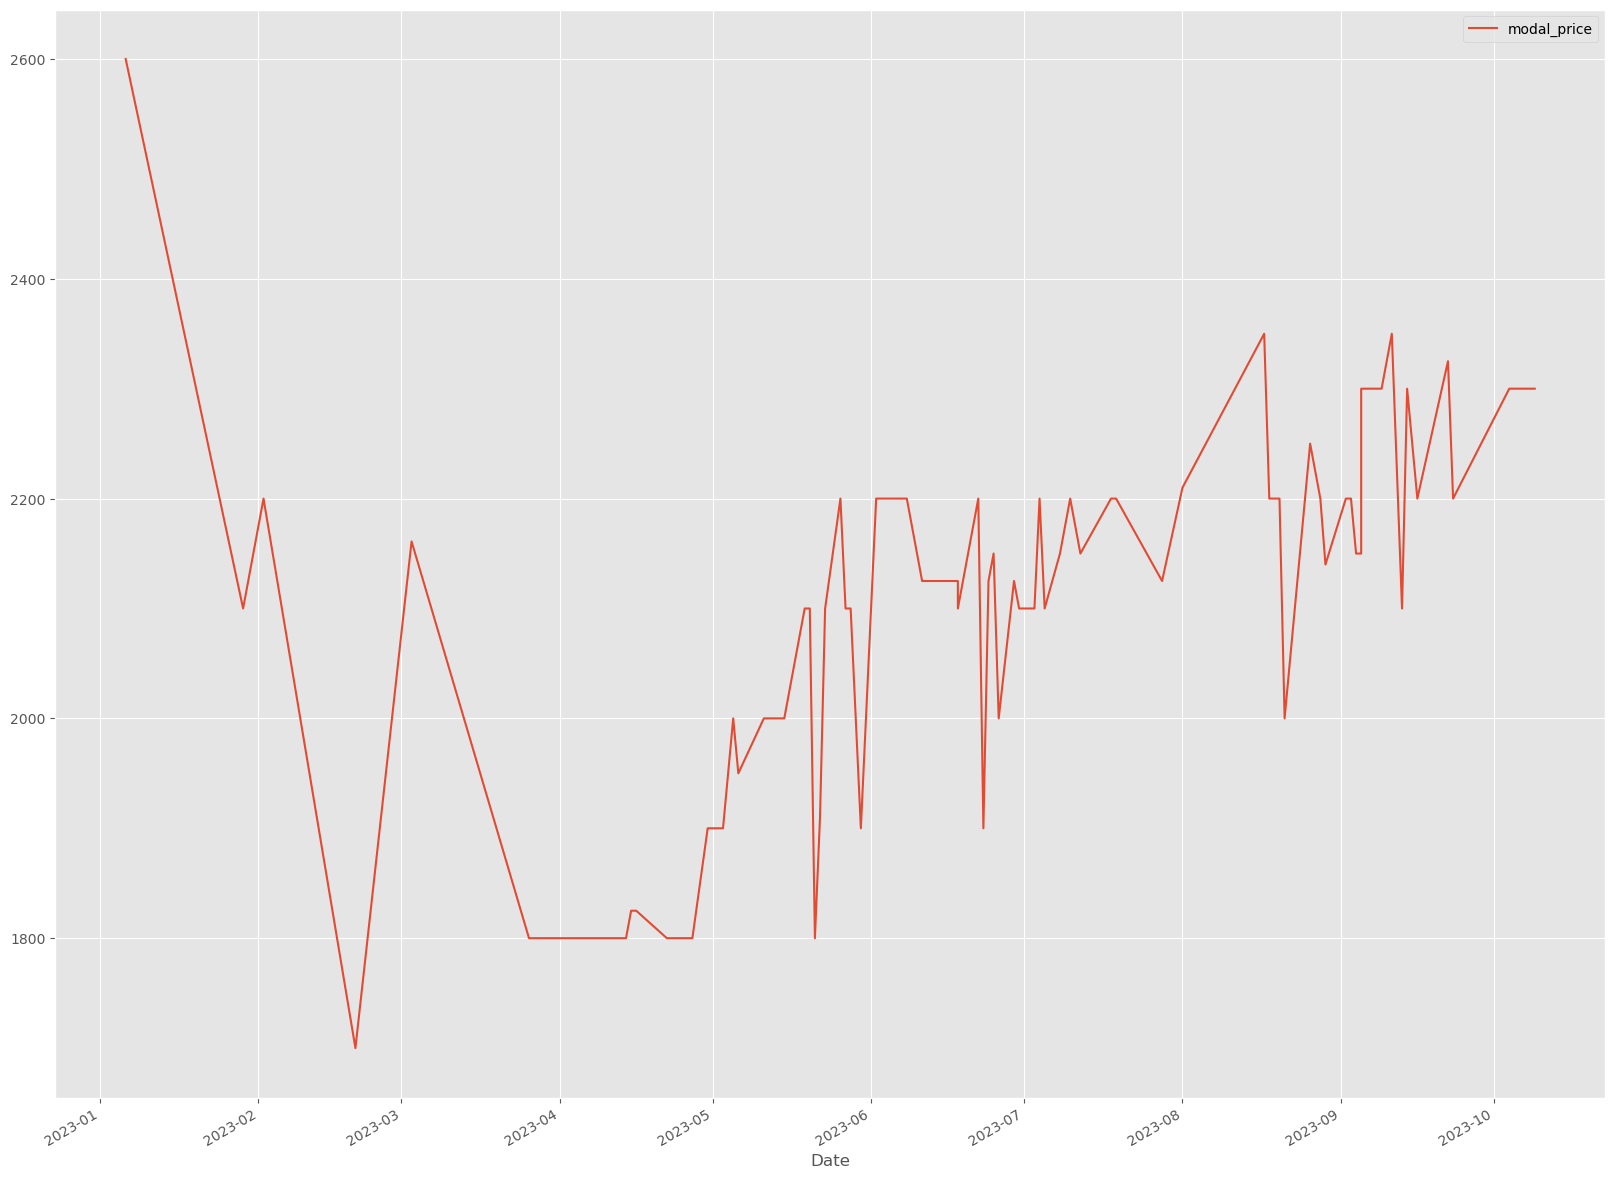

In [15]:
ax = data.plot(figsize=(20,16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_prediction, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic forecast (get_prediction, dynamic = True)')
#pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
#ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0],pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly airline passenger (x1000)')
plt.xlabel('Date')
plt.legend()
plt.show()

# Model Failed Due to lack of Data 